## **RED WINE QUALITY**

### **Introduction**

Red Wine Quality" is a dataset available on Kaggle, a platform for data science and machine learning competitions. The dataset contains information on various physicochemical properties of red wine, such as acidity, pH, residual sugar, alcohol content, etc., and their subjective quality rating provided by human experts. The data was obtained from the Vinho Verde wine region of Portugal.

**Goal:**

The main goal of the project was to investigate the different factors that can affect the quality of red wine using statistical analysis and machine learning modeling. The project aimed to explore the relationships between various physicochemical properties of the wine, such as acidity, pH, residual sugar, alcohol content, etc., and the subjective quality ratings provided by human experts.

**Objectives:**

Practice working with CSV files.

Practice performing EDA.

Practice applying statistical inference procedures.

Practice using linear machine learning models.

Practice visualizing data with Matplotlib & Seaborn.

Practice creating dashboards with Google Data Studio.

**Data Used:**

The dataset has a total of 1599 observations and 12 variables. It is a popular dataset for practicing data analysis, visualization, and machine learning techniques. It has been used in various machine learning courses and competitions, and it provides a good opportunity to explore and apply different techniques to analyze and model the data.

Data is extracted from  kaggle [Red Wine Quality](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009)

------------------------
####**Importing  packaging and data loading**
-------------------------------------

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split

# from statsmodels.formula.api import ols  # For calculation of Ordinary least squares for ANOVA
from statsmodels.stats.anova import _get_covariance, anova_lm  # For n-way ANOVA
import statsmodels.api as sm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings

warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/winequality-red.csv")

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Data exploration:**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Findings: 

We can see that there are no null values

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Now we can see if there are any duplicated values

In [ ]:
df_duplicate = df[df.duplicated()]
df_duplicate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 4 to 1596
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         240 non-null    float64
 1   volatile acidity      240 non-null    float64
 2   citric acid           240 non-null    float64
 3   residual sugar        240 non-null    float64
 4   chlorides             240 non-null    float64
 5   free sulfur dioxide   240 non-null    float64
 6   total sulfur dioxide  240 non-null    float64
 7   density               240 non-null    float64
 8   pH                    240 non-null    float64
 9   sulphates             240 non-null    float64
 10  alcohol               240 non-null    float64
 11  quality               240 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 24.4 KB


In [ ]:
df.duplicated().sum()

240

We can see that there are 240 duplicated values are exist

In [ ]:
# dropping duplicates
df.drop_duplicates(inplace=True)

# checking again
df.duplicated().any()

False

**Outliers**

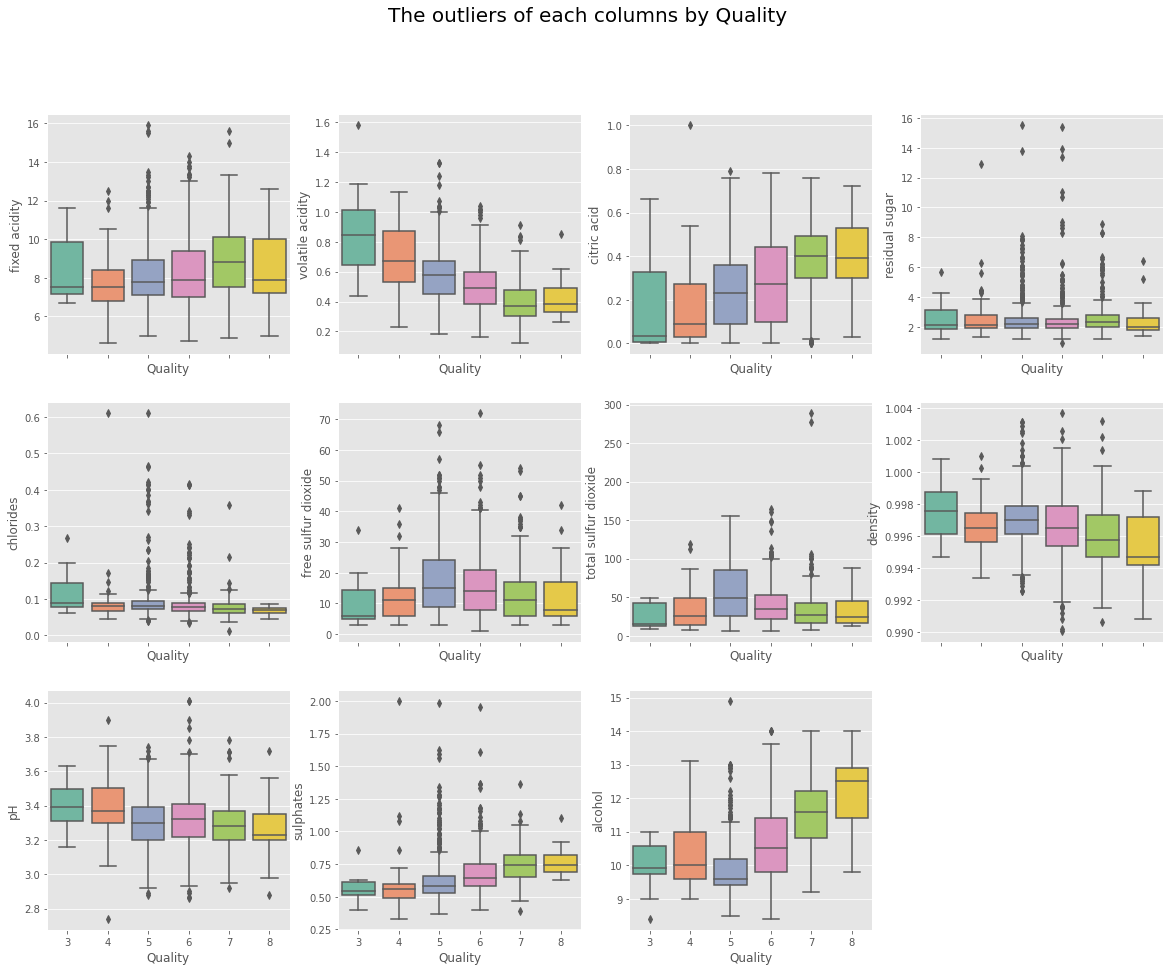

In [ ]:
plt.style.use("ggplot")
sns.set_palette("Set2")

n_features = df.shape[1] - 1
n_rows = (n_features - 1) // 4 + 1
n_cols = min(n_features, 4)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, sharex=True, figsize=(20, 5 * n_rows))
fig.suptitle("The outliers of each columns by Quality", fontsize=20)

# Plot boxplots for each feature
for i, col in enumerate(df.columns[:-1]):
    ax = axes[i // n_cols, i % n_cols]
    sns.boxplot(x="quality", y=col, data=df, ax=ax)
    ax.set_xlabel("Quality")
    ax.set_ylabel(col)

# Remove empty subplots if necessary
if n_features % 4 != 0:
    for i in range(n_features % 4, 4):
        fig.delaxes(axes[-1, i])

plt.show()

The Dataset shows that mostly every feature has outliers. Especially residual sugar, chlorides, and sulphates.

**IQR**

Interquartile Range and it is a measure of variability or spread in a dataset, representing the range between the 25th and 75th percentiles.

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [ ]:
lower_band = Q1 - 1.5 * IQR
upper_band = Q3 + 1.5 * IQR

print("Lower band:", lower_band)
print("Upper band:", upper_band)

Lower band: fixed acidity            3.95000
volatile acidity         0.01500
citric acid             -0.42000
residual sugar           0.85000
chlorides                0.03850
free sulfur dioxide    -14.00000
total sulfur dioxide   -39.50000
density                  0.99227
pH                       2.92500
sulphates                0.28000
alcohol                  7.10000
quality                  3.50000
dtype: float64
Upper band: fixed acidity            12.35000
volatile acidity          1.01500
citric acid               0.94000
residual sugar            3.65000
chlorides                 0.12250
free sulfur dioxide      42.00000
total sulfur dioxide    124.50000
density                   1.00115
pH                        3.68500
sulphates                 1.00000
alcohol                  13.50000
quality                   7.50000
dtype: float64


In [ ]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape

(1005, 12)

In [ ]:
df_out.columns[:-1]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

After applying the IQR method for outlier removal, the number of rows in the original DataFrame reduced from 1596 to 1005. Next, I will generate boxplots for each feature in the updated DataFrame.

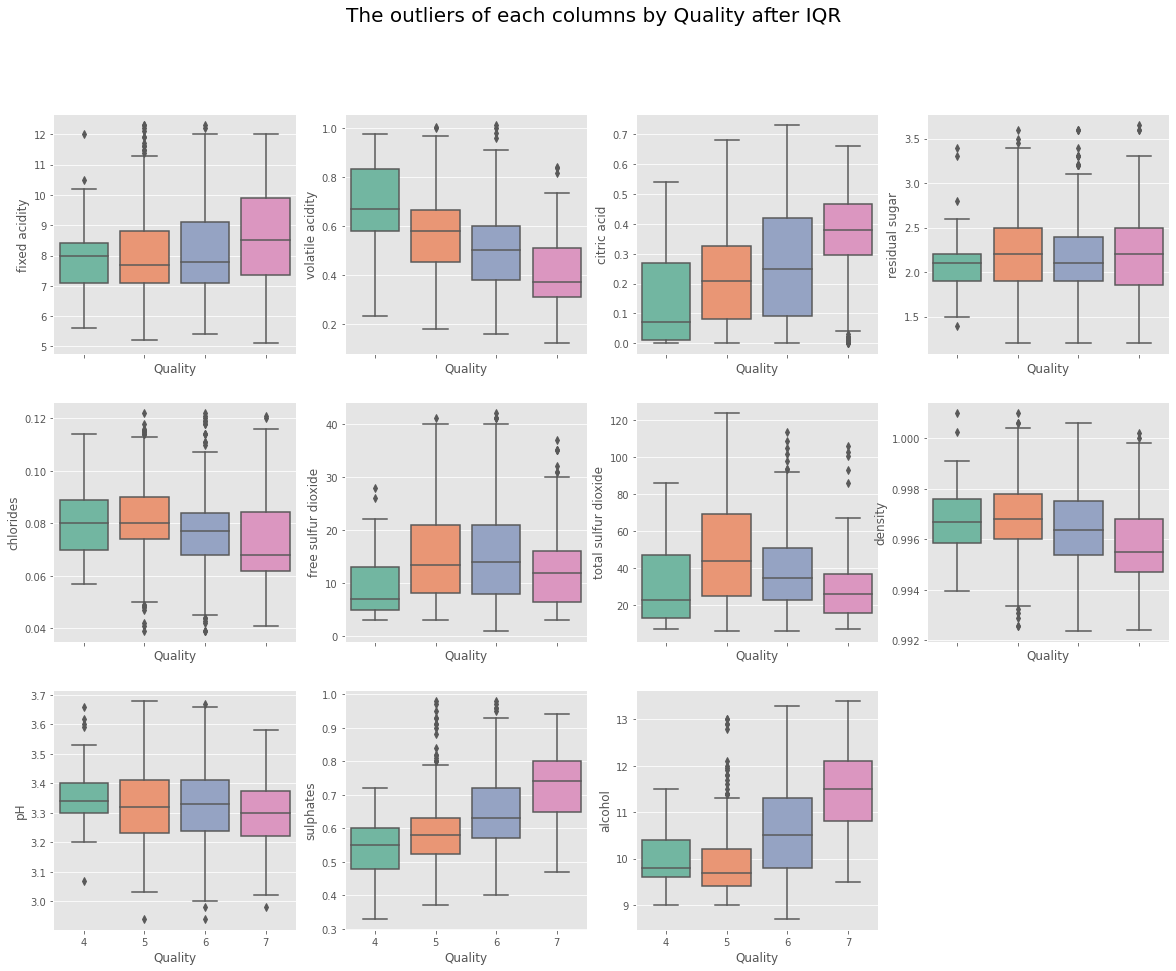

In [ ]:
# Create subplots
n_features = df_out.shape[1] - 1
n_rows = (n_features - 1) // 4 + 1
n_cols = min(n_features, 4)

fig, axes = plt.subplots(n_rows, n_cols, sharex=True, figsize=(20, 5 * n_rows))
fig.suptitle("The outliers of each columns by Quality after IQR", fontsize=20)

# Plot boxplots for each feature
for i, col in enumerate(df_out.columns[:-1]):
    ax = axes[i // n_cols, i % n_cols]
    sns.boxplot(x="quality", y=col, data=df_out, ax=ax)
    ax.set_xlabel("Quality")
    ax.set_ylabel(col)

# Remove empty subplots if necessary
if n_features % 4 != 0:
    for i in range(n_features % 4, 4):
        fig.delaxes(axes[-1, i])

plt.show()

Although the IQR method can help to identify and remove outliers, there may still be some outliers remaining in the data. There are other techniques and methods for handling outliers, such as z-score, modified z-score, median absolute deviation (MAD), and clustering-based methods.

Now we can see the histogram of the dataset

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

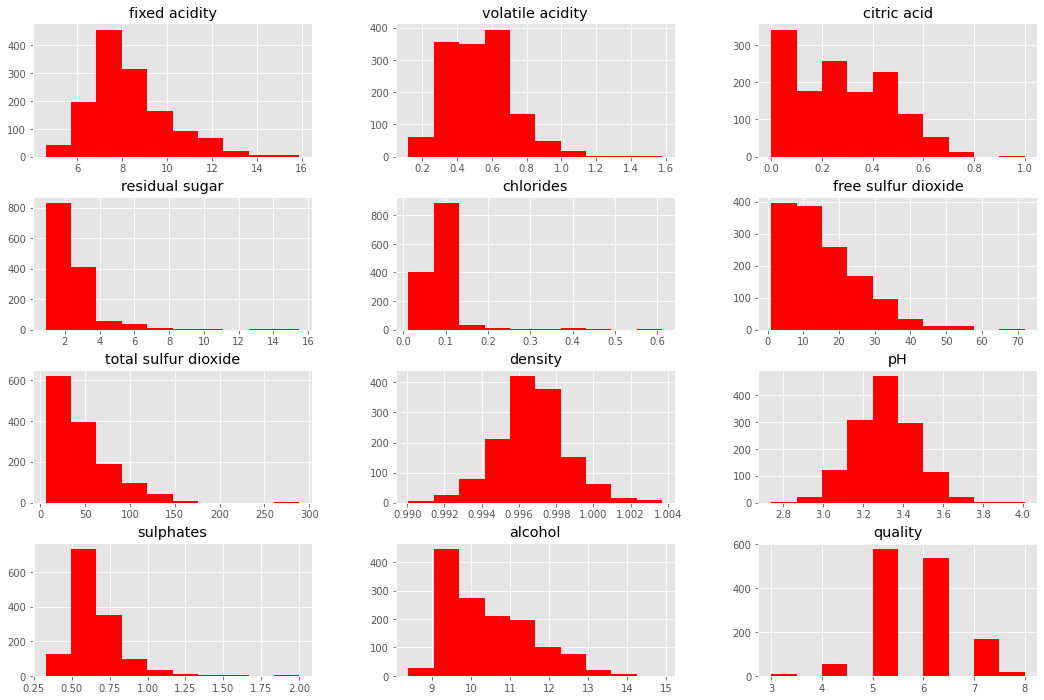

In [ ]:
df.hist(figsize=(18, 12), color="red")

Upon visualizing the distribution of each wine feature using histogram plots, it can be observed that only pH, quality, and density follow a normal distribution. The remaining features exhibit a left-skewed distribution of data.


Now we can check the histogram after removing the outliers using IQR

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

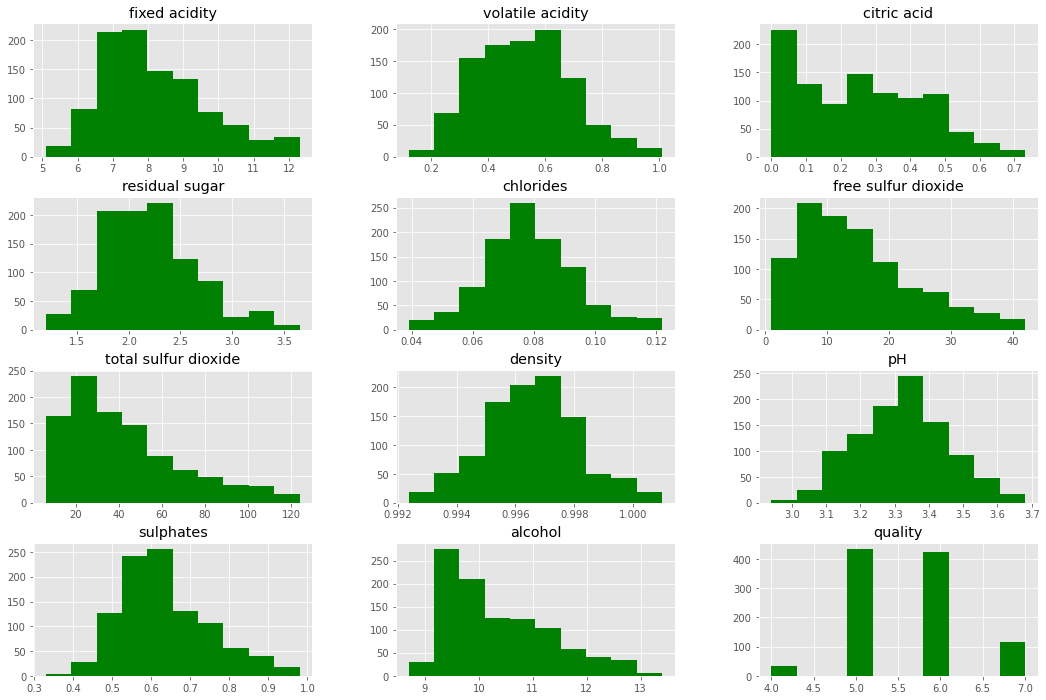

In [ ]:
df_out.hist(figsize=(18, 12), color="green")

After applying the outlier removal technique, it can be observed that the wine features with a lower number of outliers tend to follow a normal distribution. However, there are exceptions to this pattern, as the features alcohol, total sulfur dioxide, citric acid, and free sulfur dioxide still exhibit non-normal distributions despite having fewer outliers.

Although outlier removal or replacement with the z score could be performed on each feature separately, it will not be done in this case as correlation heatmaps and hypothesis testing will reveal which features are essential to wine quality.

**Correlation**

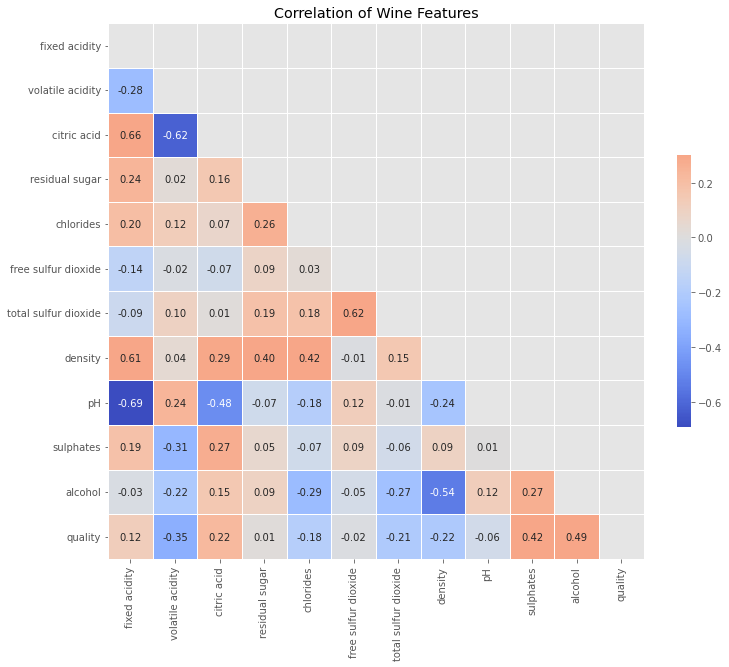

In [ ]:
corr = df_out.corr(method="pearson")
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(
    corr,
    mask=mask,
    cmap="coolwarm",
    vmax=0.3,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True,
    fmt=".2f",
    ax=ax,
)
ax.set_title("Correlation of Wine Features")
plt.show()

The following pairs of features have negative correlation: pH and fixed acidity, citric acid and volatile acidity, and density and alcohol.

The following pairs of features have positive correlation: citric acid and fixed acidity, density and fixed acidity, total sulfur dioxide and free sulfur dioxide, and alcohol and quality.

Let's see visually with only impacted features






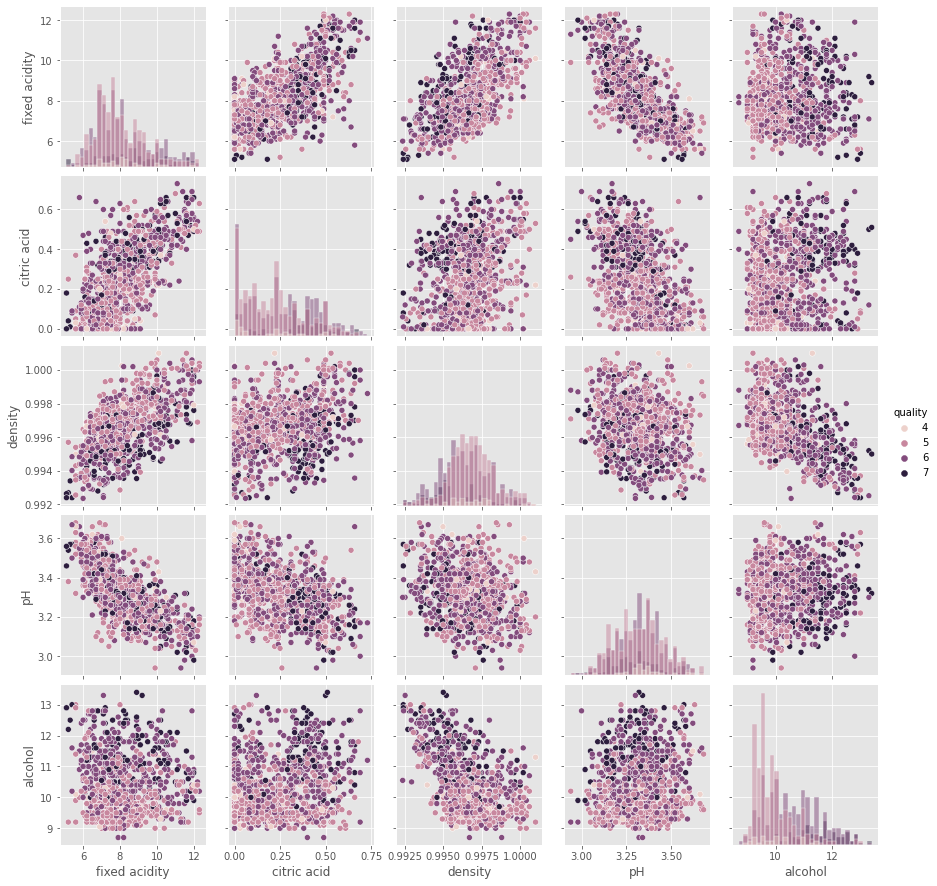

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

scatter_data = df_out[["fixed acidity", "citric acid", "density", "pH", "alcohol", "quality"]]

sns.pairplot(
    scatter_data,
    hue="quality",
    diag_kind="hist",
    plot_kws={"alpha": 1.0},
    diag_kws={"bins": 30},
)
plt.show()

we can see from the pairplot that higher quality wines tend to have a higher alcohol content and lower density. So, the negative correlation between alcohol and density may contribute to the relationship between quality and these two variables. Specifically, wines with higher alcohol content and lower density may tend to have higher quality ratings. However, it's important to note that other variables may also play a role in determining wine quality

We can see the important features in hypothesis testing


**Hypothesis testing**

In [ ]:
hy_df = df_out

In [ ]:
X_train = hy_df.iloc[:, :-1]
y_train = hy_df.iloc[:, -1]
X_train_hy = sm.add_constant(X_train)
hy = sm.OLS(y_train, X_train_hy).fit()
print(hy.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     54.81
Date:                Fri, 24 Feb 2023   Prob (F-statistic):           1.66e-94
Time:                        19:52:02   Log-Likelihood:                -869.40
No. Observations:                1005   AIC:                             1763.
Df Residuals:                     993   BIC:                             1822.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   36.7978 

The output you provided is the result of a multiple linear regression model, which attempts to predict the value of a dependent variable ("quality") based on the values of several independent variables (fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, and alcohol). The coefficients in the "coef" column indicate the estimated effect of each independent variable on the dependent variable, while holding all other variables constant.

The R-squared value of 0.378 suggests that the model explains approximately 38% of the variance in the dependent variable. This means that the independent variables included in the model account for some of the variation in the quality of the wine, but there may be other factors that are not captured by the model.

The p-values in the "P>|t|" column indicate the statistical significance of each independent variable. Specifically, they represent the probability of observing a coefficient as extreme as the one estimated in the model, assuming that the null hypothesis (that the true coefficient is zero) is true. A p-value of less than 0.05 is typically considered statistically significant, which means we can reject the null hypothesis and conclude that the corresponding independent variable is significantly related to the dependent variable.

Based on the p-values in the table, it appears that volatile acidity, total sulfur dioxide, sulphates, and alcohol are statistically significant predictors of wine quality. The other variables (fixed acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, density, and pH) do not appear to be statistically significant, although it's worth noting that there may be other models or specifications that would lead to different conclusions.

**Linear Regression:**

In [ ]:
# Split the data into X (features) and y (target variable)
X = df_out[[col for col in df_out.columns if col != "alcohol"]]
y = df_out["alcohol"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Train a linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)

# Evaluate the model on the test set
score = model.score(X_test, y_test)
print(f"Model score on test set: {score}")

Model score on test set: 0.749926616454518


**Evaluation metrics**

In [ ]:
# Coefficients, intercept, slope, and R² for train set
coefficients_train = model.coef_
intercept_train = model.intercept_
slope_train = pd.DataFrame(coefficients_train, X_train.columns, columns=["Coefficient"])
r_squared_train = model.score(X_train, y_train)

# Coefficients, intercept, slope, and R² for test set
coefficients_test = model.coef_
intercept_test = model.intercept_
slope_test = pd.DataFrame(coefficients_test, X_test.columns, columns=["Coefficient"])
r_squared_test = model.score(X_test, y_test)

# Print the results
print("Results for train set:")
print(f"Coefficients: {coefficients_train}")
print(f"Intercept: {intercept_train}")
print(f"Slope: {slope_train}")
print(f"R²: {r_squared_train}")
print("\nResults for test set:")
print(f"Coefficients: {coefficients_test}")
print(f"Intercept: {intercept_test}")
print(f"Slope: {slope_test}")
print(f"R²: {r_squared_test}")

Results for train set:
Coefficients: [ 4.61750155e-01  5.64803820e-01  6.98322783e-01  6.84539472e-01
  2.06540130e+00  9.70892923e-05 -3.27610542e-03 -6.07765870e+02
  3.14753793e+00  1.06493422e+00  2.01108160e-01]
Intercept: 598.007213996345
Slope:                       Coefficient
fixed acidity            0.461750
volatile acidity         0.564804
citric acid              0.698323
residual sugar           0.684539
chlorides                2.065401
free sulfur dioxide      0.000097
total sulfur dioxide    -0.003276
density               -607.765870
pH                       3.147538
sulphates                1.064934
quality                  0.201108
R²: 0.720875113006147

Results for test set:
Coefficients: [ 4.61750155e-01  5.64803820e-01  6.98322783e-01  6.84539472e-01
  2.06540130e+00  9.70892923e-05 -3.27610542e-03 -6.07765870e+02
  3.14753793e+00  1.06493422e+00  2.01108160e-01]
Intercept: 598.007213996345
Slope:                       Coefficient
fixed acidity            0.46175

In [ ]:
# Predicting the target variable
y_pred = model.predict(X_test[:10])

# Compare the predicted values with the actual values
df_pred = pd.DataFrame({"Actual": y_test[:10], "Predicted": y_pred})
print(df_pred)

      Actual  Predicted
1492   11.95  11.433311
1019   10.40  10.150882
1101   12.00  11.768566
844    10.60  11.023355
602     9.30   9.635845
1053   12.70  12.562932
1054    9.10   9.147583
866    11.30  11.694642
524     9.50   9.829497
107     9.30   9.435153


In [ ]:
# Get the predicted and actual values for the row with index 1492
pred_1492 = df_pred.iloc[0]
print(f"Predicted value for row 1467: {pred_1492['Predicted']}")
print(f"Actual value for row 1467: {pred_1492['Actual']}")

Predicted value for row 1467: 11.433311484096862
Actual value for row 1467: 11.95


The linear regression model was trained on a dataset with several features, including pH, residual sugar, density, and others, to predict the alcohol content of wine. The model was evaluated on both the training and test sets, resulting in an R² score of 0.72 for the training set and 0.75 for the test set. These scores suggest that the model has moderate to good performance in predicting the alcohol content of wine based on the given features.

However, it's important to note that the performance of the model could be further improved by optimizing its hyperparameters, selecting better features, or even trying out different types of models. Additionally, the model's performance should also be evaluated on other metrics besides R², such as mean squared error or mean absolute error, to gain a more comprehensive understanding of its performance.

**Logistic regression:**

In [ ]:
df_out["quality"].unique()

array([5, 6, 7, 4])

Quality has unique values and intrepreting 7 is the good quality

In logistic regression, the target variable should be binary. However, in this case, the target variable 'quality' is ordinal with values 4, 5, 6, 7 One approach to using logistic regression with this dataset could be to create a binary target variable, such as 'good quality' (1) or 'not good quality' (0), where wines with a quality of 6 or higher are considered 'good quality'.

In [ ]:
df_out["good_quality"] = df_out["quality"].apply(lambda x: int(x >= 6))

In [ ]:
df_out

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good_quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [ ]:
X = df_out.drop(["quality", "good_quality"], axis=1)
y = df_out["good_quality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f"Train score: {train_score:.3f}, Test score: {test_score:.3f}")

Train score: 0.748, Test score: 0.716


In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


print("Accuracy score:", accuracy)

Accuracy score: 0.7164179104477612


The score is not bad, try to find out the classification report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.68      0.69        94
           1       0.73      0.75      0.74       107

    accuracy                           0.72       201
   macro avg       0.72      0.71      0.71       201
weighted avg       0.72      0.72      0.72       201



Based on the classification report provided, it appears that the model performed fairly well in predicting the two classes, with an overall accuracy of 72%. The precision and recall for each class were also quite good, with values ranging from 0.70 to 0.75.

In terms of the F1-score, which is a measure of the balance between precision and recall, both classes had values above 0.69, indicating a decent balance between the two metrics.

The macro average F1-score, which gives equal weight to both classes, was 0.71, while the weighted average F1-score, which takes into account the class imbalance, was 0.72.

Overall, this classification report suggests that the model was able to effectively distinguish between the two classes, and had a relatively balanced performance in terms of precision and recall. However, further analysis may be necessary to determine the robustness and generalizability of the model.

In [ ]:
cm = confusion_matrix(y_test, y_pred)

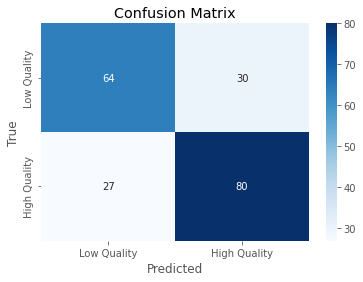

In [ ]:
sns.heatmap(
    cm,
    annot=True,
    cmap="Blues",
    fmt="g",
    xticklabels=["Low Quality", "High Quality"],
    yticklabels=["Low Quality", "High Quality"],
)

# Add labels and title
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

Based on the confusion matrix, we can see that the logistic regression model correctly predicted 64 instances of the negative class (low quality wine) and 80 instances of the positive class (good quality wine) in the test set. However, it incorrectly predicted 27 instances of low quality wine as good quality and 30 instances of good quality wine as low quality.

We can calculate the accuracy score of the model as (64+80)/(64+30+27+80) = 0.7207, which indicates that the model is 72.07% accurate in predicting the quality of red wine.







**Conclusion:**

Outliers were present in most of the wine features, but applying the IQR method reduced their number and improved normality.

Certain wine features exhibited strong positive or negative correlation, which may be useful in predicting wine quality.

The multiple linear regression model suggested that volatile acidity, total sulfur dioxide, sulphates, and alcohol were statistically significant predictors of wine quality.

The logistic regression model performed fairly well in predicting the two classes of good and not good quality wines, with an overall accuracy of 72% and good precision and recall for each class.

Further analysis and optimization could improve the performance of both models.


**Recommendations for future analysis:**

Explore other outlier removal techniques, such as clustering-based methods.

Investigate the impact of different hyperparameters and feature selection on the performance of the regression models.

Consider different types of models, such as decision trees or neural networks, for predicting wine quality.

Collect additional data on other factors that may influence wine quality, such as climate and vineyard location.